# A Simple Example  of a Gradient Descent Method  by Hand (batch  method)

## Ibrahim
## Sobh
## PS: Please add your name to the file name. 

In [10]:
import numpy as np
import math as mt
import random
import sklearn
from sklearn.datasets import make_regression 
import pylab
from scipy import stats

### We're going to solve a  Least Squares Problem with a cost function defined as following: 

In [112]:
%%latex
$$J(\Theta)=\frac{1}{2*m} \sum_{i=1}^{m} (H_\Theta(x_i)−y_i)^2$$

<IPython.core.display.Latex object>

# where 
### i) x_i is the ith sample
### ii) m is the total number of training examples 
#### and Hθ(x(i)) is the hypothesis function defined like this:

In [4]:
%%latex
$$h_\Theta(x_i)=\Theta_0  + \Theta_1 x_i$$
###### Constant (intercept) and Slope

<IPython.core.display.Latex object>

## Using Scipy/Numpy/Sklearn

In [9]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt 

In [14]:
%%time
# Generation of data: 1st method
n=10**6
X=np.linspace(0,1,n)
y=1 + X + X*np.random.random(len(X))/10

CPU times: user 20 ms, sys: 9.93 ms, total: 29.9 ms
Wall time: 27.4 ms


In [13]:
print("X: ",X, "Shape: ", np.shape(X))
print("y: ",y, "Shape: ", np.shape(y))

X:  [0.000000e+00 1.000001e-06 2.000002e-06 ... 9.999980e-01 9.999990e-01
 1.000000e+00] Shape:  (1000000,)
y:  [1.         1.00000104 1.00000215 ... 2.07001162 2.03767833 2.07536211] Shape:  (1000000,)


In [15]:
def F(x,a,b):
    return a*x + b

In [16]:
%%time
# We solve with Scipy: optimize
Coeffs=optimize.curve_fit(F,xdata=X,ydata=y)[0]
print(Coeffs)

[1.04997436 1.00000436]
CPU times: user 60.9 ms, sys: 14.3 ms, total: 75.2 ms
Wall time: 77.2 ms


In [119]:
# We solve using numpy.linalg.lstsqe

In [120]:
%%time
# We construct the Matrix A
A=np.vstack([X,np.ones(len(X))]).T
print("Shape: ", np.shape(A))
Y=y[:,np.newaxis]
print("Shape: ", np.shape(Y))

Shape:  (1000000, 2)
Shape:  (1000000, 1)
CPU times: user 3.88 ms, sys: 10.8 ms, total: 14.7 ms
Wall time: 19.1 ms


In [121]:
%%time
# We solve using numpy.linalg.lstsqe
Coeffs=np.linalg.lstsq(A,Y,rcond=None)[0]
print(Coeffs)

[[1.04984713]
 [1.00004062]]
CPU times: user 57.8 ms, sys: 39.4 ms, total: 97.2 ms
Wall time: 25.1 ms


In [122]:
%%time
# Using the Pseudo_Inverse
Apinv=np.linalg.pinv(A)

CPU times: user 193 ms, sys: 83.7 ms, total: 277 ms
Wall time: 52.6 ms


In [123]:
%%time
Coeffs=Apinv.dot(Y)
print("Hum: ", Coeffs)

Hum:  [[1.04984713]
 [1.00004062]]
CPU times: user 6.02 ms, sys: 2.47 ms, total: 8.49 ms
Wall time: 4.11 ms


In [124]:
%%time
# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(X, y)
print("Slope:", slope)
print("Intercept: ",intercept)
print("r_value, p_value, slope_std_error: ", r_value, p_value, slope_std_error )

Slope: 1.0498471275310675
Intercept:  1.0000406230804677
r_value, p_value, slope_std_error:  0.9984920396435913 0.0 5.772023163040131e-05
CPU times: user 13.6 ms, sys: 2.45 ms, total: 16 ms
Wall time: 12.7 ms


In [125]:
print(X)

[0.000000e+00 1.000001e-06 2.000002e-06 ... 9.999980e-01 9.999990e-01
 1.000000e+00]


In [18]:
# With Scikit: be careful of the SHAPEs!
from sklearn.linear_model  import LinearRegression
#X_train, X_test, Y_train, Y_test = train_test_split(X,y,random_state=42)
Xx = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
print(Xx)
# y = 1 * x_0 + 2 * x_1 + 3
yy = np.dot(Xx, np.array([1, 2])) + 0.3
print(yy)

[[1 1]
 [2 2]
 [3 3]
 [4 4]]
[ 3.3  6.3  9.3 12.3]


In [19]:
reg = LinearRegression().fit(Xx, yy)
print(reg.score(Xx, yy))
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[3, 5]])))

1.0
[1.5 1.5]
0.3000000000000016
[12.3]


In [18]:
## TRY WITH 10**7 


## A "Gradient Code"....

In [134]:
# alpha is the Learning rate
# x Set of x values
# y Set of y values
# eps
def Gradient_Method(alpha, 
                    x, 
                    y, 
                    eps=0.0001, 
                    max_iter=1000, 
                    steps=10):
    HasConverged = False
    iter = 0
    m = x.shape[0] # number of samples
    print("Number of Samples:", m)

    # initial value for theta  : chosen randomly
    # Theta=(Theta0[0],Theta1[0]) in IR^2
    # Theta0[0] -> t0 in IR
    # Theta1[0] -> t1 in IR
    
    #Pick a random Intercept value
    t0 = np.random.random(x.shape[1])
    
    #pick a random Slope value
    t1 = np.random.random(x.shape[1])
    
    print("Initial Value of Thetao[0] =", t0)
    
    print("Initial Value of Theta1[0] =", t1)

    # The total error, J(theta)  is defined as
    
    # Loss function = Sigma[(T1*x[i] + T0) - Y(i))^2]
    
    # Y[i] ---------->Ovserved Y 
    
    # T1*x[i] + T0 ------> Predicited Y
    
    # J is the Loss function ( in this case it is Least Square )
    # This is the intial Erro value
      
    J= sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 
    
    print("Total Initial Error J: ", J)

    # The Iteration Loop
    while not HasConverged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        # following: 
        
        # Derivative (loss Function)
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # We update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        
    
        # We update theta
        t0 = temp0
        t1 = temp1

        # We compute Mean Squared Error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= eps:
            print('Converged, iterations: ', iter)
            HasConverged = True
            
        if (iter % steps ==0): print("Iter: ", iter, 
                                     " Error: ",e, 
                                     " J-e:",abs(J-e), 
                                     " t0: ", t0, 
                                     " t1: ",t1)    
    
        J = e      # We update error 
        iter += 1  # We update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

In [130]:
if __name__ == '__main__':

#   We create the Data     
    x, y = make_regression(n_samples=10**4, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))

# We choose some hyperparameters  
    alpha = 0.01 # learning rate
    eps = 0.01 # convergence criteria

x.shape = (10000, 1) y.shape = (10000,)


In [135]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
theta0, theta1 = Gradient_Method(alpha, x, y, eps, max_iter=1000,
                                     steps=100)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 

# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)
    

Number of Samples: 10000
Initial Value of Thetao[0] = [0.09888619]
Initial Value of Theta1[0] = [0.58669036]
Total Initial Error J:  [13002434.6336444]
Iter:  0  Error:  [12988106.50170805]  J-e: [14328.13193635]  t0:  [0.09326159]  t1:  [0.67135227]
Iter:  100  Error:  [12367385.05048594]  J-e: [2007.88739842]  t0:  [-0.21764273]  t1:  [6.03815115]
Iter:  200  Error:  [12280351.86891757]  J-e: [281.81351265]  t0:  [-0.29443429]  t1:  [8.04976629]
Iter:  300  Error:  [12268130.05445992]  J-e: [39.61213201]  t0:  [-0.30866785]  t1:  [8.80404593]
Iter:  400  Error:  [12266411.27458183]  J-e: [5.57582635]  t0:  [-0.30867442]  t1:  [9.08697275]
Iter:  500  Error:  [12266169.22233916]  J-e: [0.7859144]  t0:  [-0.30672472]  t1:  [9.19313408]
Iter:  600  Error:  [12266135.08949054]  J-e: [0.11091661]  t0:  [-0.30527846]  t1:  [9.23298198]
Iter:  700  Error:  [12266130.2702252]  J-e: [0.01567266]  t0:  [-0.30447405]  t1:  [9.24794392]
Converged, iterations:  723
Computed value
Theta0 = [-0.304

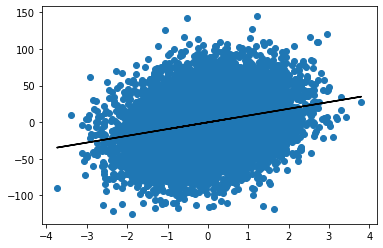

Well Done!


In [137]:
# When n is not to large ....
# We plot  the data and the line we have computed, i.e.: Y= Theta0 + Theta1 * X
for i in range(x.shape[0]):
        y_predict = theta0 + theta1*x 

pylab.plot(x,y,'o')
pylab.plot(x,y_predict,'k-')
pylab.show()
print("Well Done!")



# Do some tests with n=10^3, 10^4, 10^5, 10^6

In [23]:
# .....

In [ ]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
# WE CHANGE the value of "alpha"
alpha=0.025
theta0, theta1 = Gradient_Method(alpha, x, y, eps, max_iter=1000,
                                     steps=100)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 

# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)
    

In [25]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
# WE CHANGE the value of "alpha"
alpha=0.035
theta0, theta1 = Gradient_Method(alpha, x, y, eps, max_iter=1000,
                                     steps=100)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 
21
# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)
    

Number of Samples: 10000
Initial Value of Thetao[0] = [0.2474708]
Initial Value of Theta1[0] = [0.0300796]
Total Initial Error J:  [13101627.40635273]
Iter:  0  Error:  [13045392.29154858]  J-e: [56235.11480415]  t0:  [0.22222513]  t1:  [0.34549835]
Iter:  100  Error:  [12266870.6294179]  J-e: [53.33075472]  t0:  [-0.30646971]  t1:  [8.98128546]
Iter:  200  Error:  [12266130.1942417]  J-e: [0.05150981]  t0:  [-0.30437267]  t1:  [9.24838182]
Converged, iterations:  224
Computed value
Theta0 = [-0.3040731]       Theta1 = [9.25322146]
Intercept = -0.3037486491107916 Slope = 9.256946612556051
Error on Slope [0.00372516]
Error on Intercept [0.00032445]
CPU times: user 19.6 s, sys: 38.9 ms, total: 19.7 s
Wall time: 19.7 s


## Some remarks
#### I have chosen the function  Gradient_Method because: 
#### well, it is not really well written, so it can be improved
#### First the initial value of  Theta0 and Theta1 are chosen strictly randomly, which is the worst choice we can do. We can do a better choice.
#### Second, the "gradient"  is computed with the full dataset (i.e. the full set of avalaible data), which has a huge cost again, we can do better, at least initially. 

## Idea: when you will have your code, 
## Try different (and growing) values of m (number of samples). And use %%time to compare
## Example: m=100, m=1000, m=5000, m=10000, m=10^5, m=10^6 (be careful, it can takes a longggggg time!)

## PROBLEM 1
#### Here we choose really randomly the inital  value of Theta0 and Theta1, they are ### what we call Theta0[0] and Theta1[0] in the classical iterative algorithms 
#### (Theta0[i+1] ,Theta1[i+1])=(Theta0[i] ,Theta1[i]) - Lambda * Grad(F(Theta0[i] ,Theta1[i]))
#### You are asked to:
#### (i) Propose another method, fast, efficient and usefull (fast! i.e. with a low complexity)
#### (ii) Implement it, test it, justify it (here)
#### (iii) Please call your function Gradient_Init_Prob1

## Version 1 of my answer
## ( Keeping the same Function With Some tweaks to the intiale Theta 0 , Theta 1)

In [23]:
def get_initial_thetas(x,y):
    
    ''' Trying to find the average Intercept (Theta 0)/ that has the steapest line Slope (Theta 1)'''
    ''' Calcuating the highest Slope with the intercept using a bunch of point on the Up Far Right '''

    theta0=np.mean(y)
    
    index_x_min= np.argmin(x)
    x_mask= (x >= np.mean(x)) & (x <= np.amax(x))
    x_batch= x[x_mask]
    itemindex = np.where(x_batch)
    y_batch= y[itemindex]
    
    x_batch=x_batch[itemindex]
    y_batch=y_batch[itemindex]
    
    if len(y)>10:
        x_batch=x_batch[len(x_batch)-2:-1]
        y_batch=y_batch[len(y_batch)-2:-1]

    X=x_batch
    Y=y_batch
    
    T=(Y-y[index_x_min])/(X- x[index_x_min])
    theta1=np.amin(T[T>0])
    
    return theta0,theta1

In [420]:
# alpha is the Learning rate
# x Set of x values
# y Set of y values
# eps
def Gradient_Init_Prob1_Version_1(alpha, 
                    x, 
                    y, 
                    eps=0.0001, 
                    max_iter=1000, 
                    steps=10):
    HasConverged = False
    iter = 0
    m = x.shape[0] # number of samples
    print("Number of Samples:", m)

    # initial value for theta  : chosen randomly
    # Theta=(Theta0[0],Theta1[0]) in IR^2
    # Theta0[0] -> t0 in IR
    # Theta1[0] -> t1 in IR
    
    #Pick a random Intercept value
    #pick a random Slope value
    
    t0,t1=get_initial_thetas(x,y)
    
    
    print("Initial Value of Thetao[0] =", t0)
    
    print("Initial Value of Theta1[0] =", t1)

    # The total error, J(theta)  is defined as
    
    # Loss function = Sigma[(T1*x[i] + T0) - Y(i))^2]
    
    # Y[i] ---------->Ovserved Y 
    
    # T1*x[i] + T0 ------> Predicited Y
    
    # J is the Loss function ( in this case it is Least Square )
    # This is the intial Erro value
      
    J= sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 
    
    print("Total Initial Error J: ", J)

    # The Iteration Loop
    while not HasConverged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        # following: 
        
        # Derivative (loss Function)
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])
    
        # We update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        
    
        # We update theta
        t0 = temp0
        t1 = temp1

        # We compute Mean Squared Error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= eps:
            print('Converged, iterations: ', iter)
            HasConverged = True
            
        if (iter % steps ==0): print("Iter: ", iter, 
                                     " Error: ",e, 
                                     " J-e:",abs(J-e), 
                                     " t0: ", t0, 
                                     " t1: ",t1)    
    
        J = e      # We update error 
        iter += 1  # We update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

## Version 2 (Numpy Version)  ---> Much FASTER!!
## ( Rebuild the Gradient function Using "Numpy" instead of List Comprehnsion ) 
## With Some tweaks to the intiale Theta 0 , Theta 1)

In [21]:
def plot_grad(x,y,thetas_hist):
    if int(mt.log10(x.shape[0])) > 4:
         print ("\n---->Plot takes forever try wiht a smaller number to get a nice Graph Representation :)\n")
    else:
        iteration=0
        for theta in thetas_hist:
            theta0=theta[0][0]
            theta1=theta[0][1]
            if iteration==0:
                pylab.plot(x,y,'o')
            if iteration%16==0:
                for i in range(x.shape[0]):
                    y_predict = theta0 + theta1*x 
                pylab.plot(x,y_predict,'k--')
            if iteration==len(thetas_hist)-1:
                for i in range(x.shape[0]):
                    y_predict = theta0 + theta1*x 
                pylab.plot(x,y_predict,'r-')
            iteration+=1
        pylab.show()
    

def cost(theta,X,y):
    '''
    Calculates cost of the function.
    X & y are our points where X is (2,N).
    theta - vector.
    '''
    m = len(y)
    # Calculating Cost
    cost_value =  np.sum(np.square((theta.dot(X))-y))  
    print(cost_value)
    return cost_value

def Gradient_Init_Prob1_Version_2(learning_rate, 
                    x, 
                    y, 
                    eps=0.0001, 
                    max_iter=1000, 
                    steps=10):
    
            X_cost=x
            X=x.reshape((-1,))
            Y=y
            
            print("size of input: ", x.shape[0])

            # Creating an array of ones for algebraic calculation
            ones = [1] * len(X)

            # Here array of ones will be concatenated with X and transpose will be perform
            # This signifies that matrix multiplication can help to obtain new value

            # of theta 0 and theta 1
            X = np.transpose(np.concatenate((np.array([ones]).reshape(-1, 1),
            np.array([X]).reshape(-1, 1)), axis=1))

            # [[1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
            # [value1, value2 , ....................value_ n]]

            # Same declaring starting value of two thetas, theta 0 and theta 1,
            
            #theta = np.array([[np.mean(y),np.mean(y)]])
            theta0,theta1=get_initial_thetas(x,y)
            theta=np.array([[theta0,theta1]])
            print("Initial Value of Thetao[0] =", theta0)
            print("Initial Value of Theta1[0] =", theta1)
            intital_cost=cost(theta,X,y)
            print('Total Initial Cost:',round(cost(theta,X,y),5))
            
            theta_hist = []
            for iter in range(max_iter):
                htheta = np.dot(theta, X)
                diff_theta = htheta - Y
                partial_derivative_theta = np.dot(diff_theta, np.transpose(X)) / len(Y)
                theta = theta - learning_rate * partial_derivative_theta
                new_cost=cost(theta,X,y)
                if abs(intital_cost-new_cost) <eps:
                    print('Converged, iterations: ', iter)
                    break
                
                theta_hist.append(theta)
                theta0 = theta_hist[-1][0][0]
                theta1 = theta_hist[-1][0][1]
                if (iter % steps ==0): 
                    print("Iter: ", iter, 
                             " Error: ",round(new_cost,5), 
                             " [Old-New](Cost):",round(abs(intital_cost-new_cost),5), 
                             " t0: ", theta0, 
                             " t1: ",theta1)

                intital_cost=new_cost
                
            if iter == max_iter:
                print('Max interactions exceeded!')
                
            return theta0,theta1,theta_hist
    
            

## Initiate X,Y Points

In [20]:
if __name__ == '__main__':

#   We create the Data     
    x, y = make_regression(n_samples=10**4, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))

# We choose some hyperparameters  
    alpha = 0.01 # learning rate
    eps = 0.01 # convergence criteri

x.shape = (10000, 1) y.shape = (10000,)


In [24]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
# WE CHANGE the value of "alpha"
#alpha=0.035
alpha=0.035
theta0, theta1 = Gradient_Init_Prob1_Version_1(alpha, x, y, eps, max_iter=1000,
                                     steps=100)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 
21
# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0) 

NameError: name 'Gradient_Init_Prob1_Version_1' is not defined

size of input:  10000
Initial Value of Thetao[0] = -0.47438861248665654
Initial Value of Theta1[0] = 10.132564648213513
12273955.794849059
12273955.794849059
Total Initial Cost: 12273955.79485
12273426.058739088
Iter:  0  Error:  12273426.05874  [Old-New](Cost): 529.73611  t0:  -0.46785128234428186  t1:  10.102555462890608
12272932.19553119
12272471.774815
12272042.530920504
12271642.3517461
12271269.268344652
12270921.445216082
12270597.171258565
12270294.851333562
12270012.998403123
12269750.226200512
12269505.242398052
12269276.842238382
12269063.902597707
12268865.37645172
12268680.28771686
12268507.726441456
12268346.844323004
12268196.850529436
12268057.007803794
12267926.628833026
12267805.072863037
12267691.74254325
12267586.080985144
12267487.569020204
12267395.722643794
12267310.090632342
12267230.252322061
12267155.815538257
12267086.414665006
12267021.708845701
12266961.380305564
12266905.132787868
12266852.690096157
12266803.794735271
12266758.20664448
12266715.702016477
1

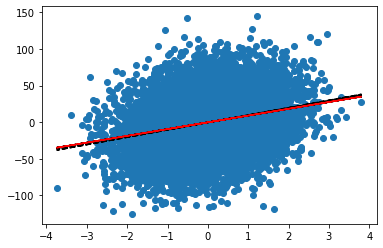

CPU times: user 2.06 s, sys: 488 ms, total: 2.55 s
Wall time: 971 ms


In [25]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
# WE CHANGE the value of "alpha"
#alpha=0.035
alpha=0.035
theta0, theta1,thetas_hist = Gradient_Init_Prob1_Version_2(alpha, x, y, eps, max_iter=1000,
                                     steps=100)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 
21
# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)
plot_grad(x,y,thetas_hist)
    

$$Cost =  \sum( \Theta.X− Y)^2 \newline $$

$$Partial\space Derivative\space\Theta = \frac{1}m * (\Theta X - Y)X^T $$

$$where\space \Theta, X, Y\space\space  are\space vectors\space and\space X\space is\space of\space the\space form\space
(2,N)\space with\space first\space column\space have\space N\space ones\space (1)\space$$

## PROBLEM 2
#### Here we "upgdrade", in the function Gradient_Method, the gradient is using the "full batch", i.e. the full set of avalaible data. You are asked to:
#### (i) Implement  the "minibatch" idea.
#### (ii) Test it. Here . Use %%time to comapre CPU time for "convergence" 
#### #### PS: Please call your function Gradient_Method_Prob2

# Idea: when you will have your code, 
## Try different (and growing) values of m (number of samples). And use %%time to compare
## Example: m=100, m=1000, m=5000, m=10000, m=10^5, m=10p^6 
## And, NOW, if possible: m=10^7

# Version 1

In [635]:
def Slice_Batch(x,y):
    full_size_power=int(mt.log10(x.shape[0]))
    if full_size_power>3:
        limit=2500*mt.ceil(full_size_power/2 +1)# Batch_size
        x=np.concatenate([x[0:limit//2], # First sub-batch At the begning until 2 times limit
                          x[len(x)//2-limit//2:len(x)//2],# Second sub-batch At the begning (middle - limit)
                          x[len(x)//2: len(x)//2 + limit//2],# Third sub-batch At the begning (middle + limit)
                          x[len(x)-limit//2:]])# Fourth sub-batch At the begning until limit
        
        y=np.concatenate([y[0:limit//2], # First sub-batch At the begning until 2 times limit
                          y[len(y)//2-limit//2:len(y)//2],# Second sub-batch At the begning (middle - limit)
                          y[len(y)//2:len(y)//2+limit//2],# Third sub-batch At the begning (middle + limit)
                          y[len(y)-limit//2:]])# Fourth sub-batch At the begning until limit
        print("Size of Batch: ", limit)

    else:
        print("mini - batch is not necessary due to data set small size ")
    return x,y

def Gradient_Method_Prob2_Version_1(alpha, 
                    x, 
                    y, 
                    eps=0.0001,
                    max_iter=1000, 
                    steps=10):
    HasConverged = False
    iter = 0

  
    print("Size of input: ", x.shape[0])
    # initial value for theta  : chosen randomly
    # Theta=(Theta0[0],Theta1[0]) in IR^2
    # Theta0[0] -> t0 in IR
    # Theta1[0] -> t1 in IR
    
    #Pick a random Intercept value
    #pick a random Slope value
    x,y=Slice_Batch(x,y)
    t0,t1=get_initial_thetas(x,y)
    
    m = x.shape[0] # number of samples
    
    
    print("Initial Value of Thetao[0] =", t0)
    
    print("Initial Value of Theta1[0] =", t1)

    # The total error, J(theta)  is defined as
    
    # Loss function = Sigma[(T1*x[i] + T0) - Y(i))^2]
    
    # Y[i] ---------->Ovserved Y 
    
    # T1*x[i] + T0 ------> Predicited Y
    
    # J is the Loss function ( in this case it is Least Square )
    # This is the intial Erro value
      
    J= sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 
    
    print("Total Initial Error J: ", J)

    # The Iteration Loop
    while not HasConverged:
        # for each training sample, compute the gradient (d/d_theta j(theta))
        # following: 
        
        # Derivative (loss Function)
        grad0 = 1.0/m * sum([(t0 + t1*x[i] - y[i]) for i in range(m)]) 
        grad1 = 1.0/m * sum([(t0 + t1*x[i] - y[i])*x[i] for i in range(m)])

        # We update the theta_temp
        temp0 = t0 - alpha * grad0
        temp1 = t1 - alpha * grad1
        
    
        # We update theta
        t0 = temp0
        t1 = temp1

        # We compute Mean Squared Error
        e = sum( [ (t0 + t1*x[i] - y[i])**2 for i in range(m)] ) 

        if abs(J-e) <= eps:
            print('Converged, iterations: ', iter)
            HasConverged = True
            
        if (iter % steps ==0): print("Iter: ", iter, 
                                     " Error: ",e, 
                                     " J-e:",abs(J-e), 
                                     " t0: ", t0, 
                                     " t1: ",t1)    
    
        J = e      # We update error 
        iter += 1  # We update iter
    
        if iter == max_iter:
            print('Max interactions exceeded!')
            converged = True

    return t0,t1

## Version 2 (Numpy Version) 

In [632]:
def Gradient_Method_Prob2_Version_2(learning_rate, 
                    x, 
                    y, 
                    eps=0.0001, 
                    max_iter=1000, 
                    steps=10):
            print("Size of input: ", x.shape[0])
            
            x,y=Slice_Batch(x,y)
            
            X=x.reshape((-1,))
            Y=y
            

            # Creating an array of ones for algebraic calculation
            ones = [1] * len(X)

            # Here array of ones will be concatenated with X and transpose will be perform
            # This signifies that matrix multiplication can help to obtain new value

            # of theta 0 and theta 1
            X = np.transpose(np.concatenate((np.array([ones]).reshape(-1, 1),
            np.array([X]).reshape(-1, 1)), axis=1))

            # [[1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
            # [value1, value2 , ....................value_ n]]

            # Same declaring starting value of two thetas, theta 0 and theta 1,
            
            #theta = np.array([[np.mean(y),np.mean(y)]])
            theta0,theta1=get_initial_thetas(x,y)
            
            theta=np.array([[theta0,theta1]])
            
            print("Initial Value of Thetao[0] =", theta0)
            print("Initial Value of Theta1[0] =", theta1)
            intital_cost=cost(theta,X,y)
            print('Total Initial Cost',round(cost(theta,X,y),5))
            
            theta_hist = []
            for iter in range(max_iter):
                htheta = np.dot(theta, X)
                diff_theta = htheta - Y
                partial_derivative_theta = np.dot(diff_theta, np.transpose(X)) / len(Y)
                theta = theta - learning_rate * partial_derivative_theta
                new_cost=cost(theta,X,y)
                if abs(intital_cost-new_cost) <eps:
                    print('Converged, iterations: ', iter)
                    break
                
                theta_hist.append(theta)
                theta0 = theta_hist[-1][0][0]
                theta1 = theta_hist[-1][0][1]
                if (iter % steps ==0): 
                    print("Iter: ", iter, 
                             " Error: ",round(new_cost,5), 
                             " J-e:",round(abs(intital_cost-new_cost),5), 
                             " t0: ", theta0, 
                             " t1: ",theta1)

                intital_cost=new_cost
                
            if iter == max_iter:
                print('Max interactions exceeded!')
                
            return theta0,theta1,theta_hist

In [637]:
if __name__ == '__main__':

#   We create the Data     
    x, y = make_regression(n_samples=10**6, n_features=1, n_informative=1, 
                        random_state=0, noise=35) 
    print('x.shape = %s y.shape = %s' %(x.shape, y.shape))

# We choose some hyperparameters  
    alpha = 0.01 # learning rate
    eps = 0.01 # convergence criteri

x.shape = (1000000, 1) y.shape = (1000000,)


In [638]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
# WE CHANGE the value of "alpha"
#alpha=0.035
alpha=0.035
theta0, theta1 = Gradient_Method_Prob2_Version_1(alpha, x.copy(), y.copy(), eps, max_iter=1000,
                                     steps=100)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 

# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)

Size of input:  1000000
Size of Batch:  10000
Initial Value of Thetao[0] = -0.03790922883399471
Initial Value of Theta1[0] = 55.77006281828385
Total Initial Error J:  [37279631.04030775]
Iter:  0  Error:  [36386543.11463701]  J-e: [893087.92567074]  t0:  [-0.04241068]  t1:  [56.66190848]
Iter:  100  Error:  [24337561.48792726]  J-e: [704.63595678]  t0:  [-0.21415665]  t1:  [80.49428144]
Iter:  200  Error:  [24328054.58891194]  J-e: [0.55611018]  t0:  [-0.22465407]  t1:  [81.16366687]
Converged, iterations:  257
Computed value
Theta0 = [-0.22505359]       Theta1 = [81.18048778]
Intercept = 0.0010496294035381298 Slope = 81.1922665739615
Error on Slope [0.0117788]
Error on Intercept [0.22610322]
CPU times: user 40.9 s, sys: 93.5 ms, total: 41 s
Wall time: 41.1 s


In [640]:
%%time
# We call gradient descent, this gives approximation 
# of theta0 and theta1
# WE CHANGE the value of "alpha"
#alpha=0.035
alpha=0.035
theta0, theta1,thetas_hist = Gradient_Method_Prob2_Version_2(alpha, x.copy(), y.copy(), eps, max_iter=1000,
                                     steps=100)
print("Computed value")
print(('Theta0 = %s       Theta1 = %s') %(theta0, theta1)) 

# We check a good approximation of the "exact" value
# with scipy linear regression 
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(x[:,0], y)
print(('Intercept = %s Slope = %s') %(intercept, slope))
print("Error on Slope", slope-theta1)
print("Error on Intercept", intercept-theta0)

Size of input:  1000000
Size of Batch:  10000
Initial Value of Thetao[0] = -0.03790922883399471
Initial Value of Theta1[0] = 55.77006281828385
Total Initial Cost 37279631.04031
Iter:  0  Error:  36386543.11464  J-e: 893087.92567  t0:  -0.0424106849489516  t1:  56.6619084777314
Iter:  100  Error:  24337561.48793  J-e: 704.63596  t0:  -0.21415665156001448  t1:  80.49428143701331
Iter:  200  Error:  24328054.58891  J-e: 0.55611  t0:  -0.2246540703253696  t1:  81.16366686632055
Converged, iterations:  257
Computed value
Theta0 = -0.22505111325671467       Theta1 = 81.18039594435312
Intercept = 0.0010496294035381298 Slope = 81.1922665739615
Error on Slope 0.011870629608381478
Error on Intercept 0.22610074266025282
CPU times: user 399 ms, sys: 135 ms, total: 534 ms
Wall time: 98.7 ms


In [103]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [106]:
Xx = np.array([[1, 1], [2, 2], [3, 3], [4, 4]])
print(Xx)
# y = 1 * x_0 + 2 * x_1 + 3
yy = np.dot(Xx, np.array([1, 2])) + 3
print(yy)

[[1 1]
 [2 2]
 [3 3]
 [4 4]]
[ 6  9 12 15]


In [107]:
reg = LinearRegression().fit(Xx, yy)
print(reg.score(Xx, yy))
print(reg.coef_)
print(reg.intercept_)
print(reg.predict(np.array([[3, 5]])))

1.0
[1.5 1.5]
3.0000000000000018
[15.]
